In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#to read and display the dataset into pandas data frame
marketing=pd.read_csv("Marketing_train.csv")
marketing.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,admin.,single,university.degree,unknown,no,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no
1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no
2,42.0,technician,married,high.school,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no
3,55.0,management,divorced,NaN,unknown,yes,yes,cellular,jul,wed,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no
4,NaN,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,...,1,failure,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,no


# Data Cleaning:-


In [3]:
#checking the unique values present in the categorical fetures

for i in marketing.columns:
    if marketing[i].dtype==type(object):
        print(i,end=": ")
        print("\n",marketing[i].unique())
        print()

profession: 
 ['admin.' 'blue-collar' 'technician' 'management' 'services' 'unemployed'
 'housemaid' 'unknown' 'self-employed' 'retired' 'student' 'entrepreneur']

marital: 
 ['single' 'married' 'divorced' 'unknown']

schooling: 
 ['university.degree' nan 'high.school' 'basic.4y' 'basic.9y'
 'professional.course' 'basic.6y' 'unknown' 'illiterate']

default: 
 ['unknown' 'no' 'yes']

housing: 
 ['no' 'yes' 'unknown']

loan: 
 ['no' 'yes' 'unknown']

contact: 
 ['cellular' 'telephone']

month: 
 ['nov' 'jul' 'may' 'aug' 'apr' 'jun' 'mar' 'oct' 'sep' 'dec']

day_of_week: 
 ['mon' 'wed' 'tue' 'fri' 'thu' nan]

poutcome: 
 ['nonexistent' 'failure' 'success']

responded: 
 ['no' 'yes']



### as there nan values mentioned as unknown, follwoing steps are taken to gt rid of it

In [4]:
#re-redaing the data with Nan values
marketing=pd.read_csv("Marketing_train.csv",na_values="unknown")
marketing.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,admin.,single,university.degree,NaN,no,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no
1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no
2,42.0,technician,married,high.school,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no
3,55.0,management,divorced,NaN,NaN,yes,yes,cellular,jul,wed,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no
4,NaN,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,...,1,failure,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,no


# EDA

In [5]:
#to check nthe size of the dataset

marketing.shape

(7414, 22)

In [6]:
#to check the columns
marketing.columns

Index(['custAge', 'profession', 'marital', 'schooling', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths', 'pastEmail',
       'responded'],
      dtype='object')

In [7]:
#descriptive statistics
marketing.describe()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
count,5610.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000
mean,40.009804,2.518344,960.024548,0.184111,0.052091,93.570708,-40.561316,3.583141,5165.224251,959.797028,0.361883
std,10.574616,2.695055,192.845029,0.516775,1.568399,0.578345,4.649800,1.744865,73.108669,193.969418,1.261668
min,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,999.000000,0.000000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,999.000000,0.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,999.000000,0.000000
max,94.000000,40.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,999.000000,18.000000


In [8]:
#to check the datatypes of the features of the columns
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7414 entries, 0 to 7413
Data columns (total 22 columns):
custAge           5610 non-null float64
profession        7353 non-null object
marital           7406 non-null object
schooling         5028 non-null object
default           5982 non-null object
housing           7246 non-null object
loan              7246 non-null object
contact           7414 non-null object
month             7414 non-null object
day_of_week       6703 non-null object
campaign          7414 non-null int64
pdays             7414 non-null int64
previous          7414 non-null int64
poutcome          7414 non-null object
emp.var.rate      7414 non-null float64
cons.price.idx    7414 non-null float64
cons.conf.idx     7414 non-null float64
euribor3m         7414 non-null float64
nr.employed       7414 non-null float64
pmonths           7414 non-null float64
pastEmail         7414 non-null int64
responded         7414 non-null object
dtypes: float64(7), int64(4), ob

In [9]:
#missing value analysis
marketing.isnull().sum()

custAge           1804
profession          61
marital              8
schooling         2386
default           1432
housing            168
loan               168
contact              0
month                0
day_of_week        711
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
pmonths              0
pastEmail            0
responded            0
dtype: int64

### as the dataset is small, so dropping the nan values will not help, so we have proceed ahead with imputation

# Missing Value Imputation
- for categorical mode imputation
- for numerical mean imputation

In [10]:
# Mean Imputation Missing Values for Numeric Variables
marketing["custAge"] = marketing["custAge"].fillna(marketing["custAge"].mean())

# Mode Imputation of Missing Values for Categorical Variables
marketing["schooling"] = marketing["schooling"].fillna(marketing["schooling"].mode()[0])
marketing["day_of_week"] = marketing["day_of_week"].fillna(marketing["day_of_week"].mode()[0])
marketing["default"] = marketing["default"].fillna(marketing["default"].mode()[0])
marketing["loan"] = marketing["loan"].fillna(marketing["loan"].mode()[0])
marketing["profession"] = marketing["profession"].fillna(marketing["profession"].mode()[0])
marketing["housing"] = marketing["housing"].fillna(marketing["housing"].mode()[0])
marketing["marital"] = marketing["marital"].fillna(marketing["marital"].mode()[0])

# Checking the count of missing values
marketing.isnull().sum()


custAge           0
profession        0
marital           0
schooling         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
pmonths           0
pastEmail         0
responded         0
dtype: int64

In [11]:
#checking the unique values present in the categorical fetures

for i in marketing.columns:
    if marketing[i].dtype==type(object):
        print(i,end=": ")
        print("\n",marketing[i].unique())
        print()

profession: 
 ['admin.' 'blue-collar' 'technician' 'management' 'services' 'unemployed'
 'housemaid' 'self-employed' 'retired' 'student' 'entrepreneur']

marital: 
 ['single' 'married' 'divorced']

schooling: 
 ['university.degree' 'high.school' 'basic.4y' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']

default: 
 ['no' 'yes']

housing: 
 ['no' 'yes']

loan: 
 ['no' 'yes']

contact: 
 ['cellular' 'telephone']

month: 
 ['nov' 'jul' 'may' 'aug' 'apr' 'jun' 'mar' 'oct' 'sep' 'dec']

day_of_week: 
 ['mon' 'wed' 'tue' 'fri' 'thu']

poutcome: 
 ['nonexistent' 'failure' 'success']

responded: 
 ['no' 'yes']



# univariate analyis of traget variable

In [12]:
#univariate analysis
marketing["responded"].value_counts()

no     6574
yes     840
Name: responded, dtype: int64

In [13]:
#checking teh distribution os the target variable in percentage
marketing["responded"].value_counts(normalize=True)

no     0.886701
yes    0.113299
Name: responded, dtype: float64

# Observation
- 88%  said no for the campaign
- only 11% said yes for the campaign
- lets put a countplot and view the response

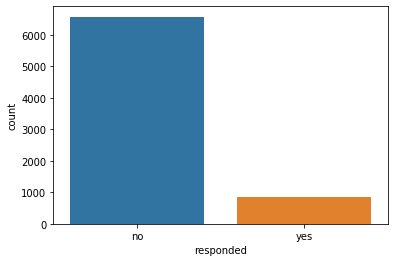

In [14]:
#countplot to check the distribution of target variable
sb.countplot(marketing["responded"])

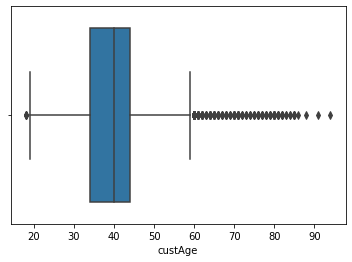

In [15]:
# checking for the outliers in the columns
sb.boxplot(marketing["custAge"])

### here the above boxplot shows that, the median age is 40.there are outliers after 60.majority of the customer age is between 35 to 45 years

In [16]:
# count the outliers
marketing[marketing["custAge"]>60]["custAge"].count()

141

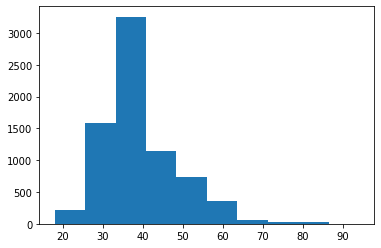

In [17]:
#plotting  histogram for the variable cust age
ax=plt.hist(marketing["custAge"],bins=10)

### the above histogram showed us the data is skewed

# Bi-variate analysis

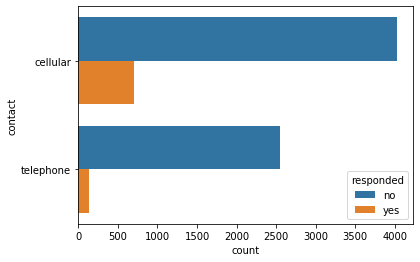

In [18]:
#check how many responded, when the contact was celuular
sb.countplot(y= marketing["contact"],hue=marketing["responded"])

### people who were contacted by cellular responded no than telepphone

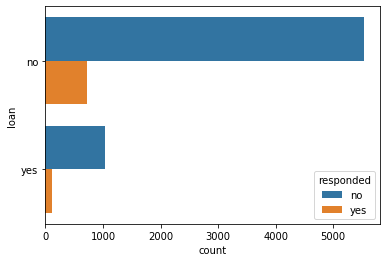

In [19]:
#check how loan is affecting  the target
sb.countplot(y= marketing["loan"],hue=marketing["responded"])

### people who have loan responded no and very less respnoded yes and vice versa

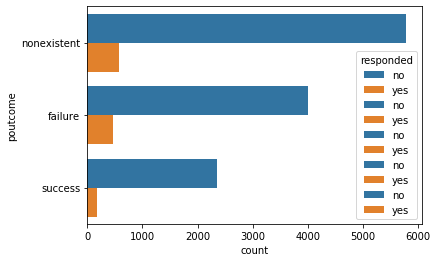

In [20]:
sb.countplot(y= marketing["day_of_week"],hue=marketing["responded"])
sb.countplot(y= marketing["month"],hue=marketing["responded"])
sb.countplot(y= marketing["marital"],hue=marketing["responded"])
sb.countplot(y= marketing["schooling"],hue=marketing["responded"])
sb.countplot(y= marketing["poutcome"],hue=marketing["responded"])


### there was better response when :
- when contacted on mon
- duirng the month may
- married people
- profession is admin
- eductaion is university degree
- contacted through mobile
- they are new customers-previous outcome was non-existant

# Calculate the correlation for the numeric values

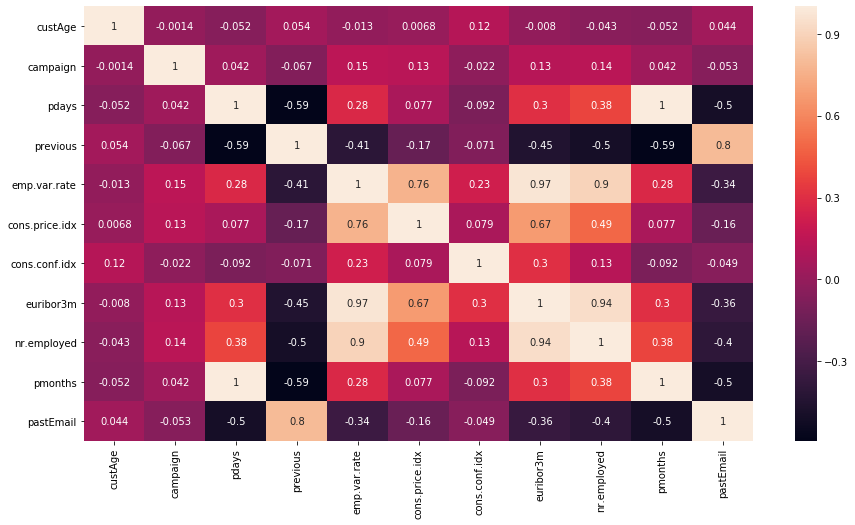

In [21]:
#calculate the correlation
corr= marketing.corr()

#setting the size of the figure
plt.figure(figsize=(15,8))

#plot the correlation using the heatmap
ax=sb.heatmap(corr, annot=True)

# Encoding the categorical variables

In [22]:
#columns to perform label encoding
cols_to_le=['profession', 'marital', 'schooling','contact', 'month', 'day_of_week',
            'poutcome','responded']

#Label encoding the categorical variables
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for column in cols_to_le:
    marketing[column]= le.fit_transform(marketing[column])
    
marketing.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.000000,0,2,6,no,no,no,0,7,1,...,0,1,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,0
1,40.009804,1,1,6,no,no,no,0,3,1,...,0,1,1.4,93.918,-42.7,4.960,5228.1,999.0,0,0
2,42.000000,9,1,3,no,no,no,1,6,1,...,0,1,1.1,93.994,-36.4,4.857,5191.0,999.0,0,0
3,55.000000,4,0,6,no,yes,yes,0,3,4,...,0,1,1.4,93.918,-42.7,4.962,5228.1,999.0,0,0
4,40.009804,0,0,6,no,yes,no,0,6,3,...,1,0,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,0


In [23]:
#!pip install category_encoders

In [24]:
#columns to perform one-hot encoding
cols_to_ohe=['default',"housing","loan"]

#one-hot encoding the categorical variables
import category_encoders as ce

ce_ohe=ce.OneHotEncoder(cols=cols_to_ohe)
marketing= ce_ohe.fit_transform(marketing)
    
marketing.head()

,custAge,profession,marital,schooling,default_1,default_2,housing_1,housing_2,loan_1,loan_2,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.000000,0,2,6,1,0,1,0,1,0,...,0,1,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,0
1,40.009804,1,1,6,1,0,1,0,1,0,...,0,1,1.4,93.918,-42.7,4.960,5228.1,999.0,0,0
2,42.000000,9,1,3,1,0,1,0,1,0,...,0,1,1.1,93.994,-36.4,4.857,5191.0,999.0,0,0
3,55.000000,4,0,6,1,0,0,1,0,1,...,0,1,1.4,93.918,-42.7,4.962,5228.1,999.0,0,0
4,40.009804,0,0,6,1,0,0,1,1,0,...,1,0,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,0


In [25]:
#replacing the 999 value to -1 in pdays and pmonths
marketing["pdays"].replace(999,-1,inplace =True)
marketing["pmonths"].replace(999,-1,inplace =True)

marketing.head(5)

,custAge,profession,marital,schooling,default_1,default_2,housing_1,housing_2,loan_1,loan_2,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.000000,0,2,6,1,0,1,0,1,0,...,0,1,-0.1,93.200,-42.0,4.191,5195.8,-1.0,0,0
1,40.009804,1,1,6,1,0,1,0,1,0,...,0,1,1.4,93.918,-42.7,4.960,5228.1,-1.0,0,0
2,42.000000,9,1,3,1,0,1,0,1,0,...,0,1,1.1,93.994,-36.4,4.857,5191.0,-1.0,0,0
3,55.000000,4,0,6,1,0,0,1,0,1,...,0,1,1.4,93.918,-42.7,4.962,5228.1,-1.0,0,0
4,40.009804,0,0,6,1,0,0,1,1,0,...,1,0,-1.8,92.893,-46.2,1.291,5099.1,-1.0,1,0


In [26]:
#splitting the data into x and y
x=marketing.drop("responded",axis=1)
y=marketing["responded"]

# Standarization of data

In [27]:
#standardization of data
cnames=["custAge","campaign","pdays","previous","emp.var.rate","cons.price.idx","cons.conf.idx",
        "euribor3m","nr.employed","pmonths","pastEmail"]

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
for col in cnames:
    x[col]=sc.fit_transform(x[col].values.reshape(-1,1))
    
x.head()

,custAge,profession,marital,schooling,default_1,default_2,housing_1,housing_2,loan_1,loan_2,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
0,1.629770e+00,0,2,6,1,0,1,0,1,0,...,-0.178638,-0.356294,1,-0.096978,-0.641025,-0.309429,0.348394,0.418252,-0.201061,-0.286848
1,7.725190e-16,1,1,6,1,0,1,0,1,0,...,-0.178638,-0.356294,1,0.859475,0.600533,-0.459983,0.789146,0.860089,-0.201061,-0.286848
2,2.163789e-01,9,1,3,1,0,1,0,1,0,...,-0.178638,-0.356294,1,0.668184,0.731952,0.895006,0.730111,0.352591,-0.201061,-0.286848
3,1.629770e+00,4,0,6,1,0,0,1,0,1,...,-0.178638,-0.356294,1,0.859475,0.600533,-0.459983,0.790292,0.860089,-0.201061,-0.286848
4,7.725190e-16,0,0,6,1,0,0,1,1,0,...,-0.178638,1.578915,0,-1.180959,-1.171886,-1.212754,-1.313738,-0.904526,-0.201061,0.505806


In [28]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Fitting a Logistic Regression Model

In [29]:
#using logistic regression model to the training set
from sklearn.linear_model import LogisticRegression
classifier_log=LogisticRegression()
model=classifier_log.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
#predicting on the test data
y_pred_log=classifier_log.predict(x_test)

In [31]:

#checking on teh accuracy of the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_log,y_test)*100)

91.43627781523938


# Fitting a decision tree model

In [32]:
#fitting the decision_tree model
from sklearn.tree import DecisionTreeClassifier
classifier_tree= DecisionTreeClassifier()
model= classifier_tree.fit(x_train,y_train)


In [33]:

#predicting on the test data
y_pred_tree=classifier_tree.predict(x_test)

In [34]:

#checking on teh accuracy of the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_tree,y_test)*100)

84.49089683074848


# Fitting a RandomForestClassifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
classifier_forest= RandomForestClassifier(n_estimators=100,criterion="entropy",random_state=0)
model=classifier_forest.fit(x_train,y_train)

In [36]:
#predicting on the test data
y_pred_forest=classifier_forest.predict(x_test)

In [37]:
#checking on teh accuracy of the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_forest,y_test)*100)

90.22252191503709


# ROC Curve

In [38]:
probs=classifier_forest.predict_proba(x_test)
probs

array([[0.99, 0.01],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [0.98, 0.02],
       [0.97, 0.03],
       [1.  , 0.  ]])

In [39]:
#keep probabilitiesof the positive calss only
from sklearn import metrics
prob_positive=probs[:,1]
fpr,tpr,threshold =metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print("Area under the curve:",roc_auc)

Area under the curve: 0.759500097162845


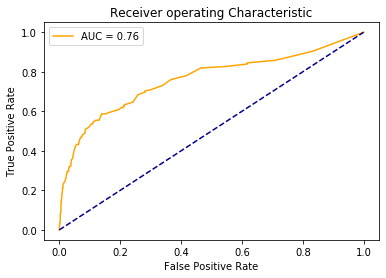

In [40]:
#plot roc curve
plt.title("Receiver operating Characteristic")
plt.plot(fpr,tpr,"orange",label = "AUC = %0.2f" % roc_auc)
plt.legend(loc="upper left")
plt.plot([0,1],[0,1],color="darkblue",linestyle="--")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

# K FOLD

In [41]:
x= x.to_numpy()
type(x)

numpy.ndarray

In [42]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True)

# enumerate the splits and summarize the distributions
for train_ix, test_ix in kfold.split(x, y):
    # select rows
    train_X, test_X = x[train_ix], x[test_ix]
    train_y, test_y = y[train_ix], y[test_ix]
    
    # summarize train and test composition
    train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
    print('Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))


Train: 0=5256, 1=675, Test: 0=1318, 1=165
Train: 0=5260, 1=671, Test: 0=1314, 1=169
Train: 0=5259, 1=672, Test: 0=1315, 1=168
Train: 0=5260, 1=671, Test: 0=1314, 1=169
Train: 0=5261, 1=671, Test: 0=1313, 1=169


### k fold validation will not distribute minority and majoritycalss samples in a approprieate ratio .For imbalanced class problem, we need to divide the samples of minority and majority classes into appropriateratio in train set and test set

In [43]:
from sklearn.model_selection import StratifiedKFold

strata_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

scores=[]

# enumerate the splits and summarize the distributions
for train_ix, test_ix in strata_kfold.split(x, y):
    # select rows
    train_X, test_X = x[train_ix], x[test_ix]
    train_y, test_y = y[train_ix], y[test_ix]
    # summarize train and test composition
    train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
    print('Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
    model = classifier_forest.fit(train_X, train_y)
    predictions=classifier_forest.predict(test_X)
    scores.append(model.score(test_X,test_y))
    
    

print('Scores from each prediction:', scores)
print('\nAverage startified k-fold score:', np.mean(scores))   


Train: 0=5916, 1=756, Test: 0=658, 1=84
Train: 0=5916, 1=756, Test: 0=658, 1=84
Train: 0=5916, 1=756, Test: 0=658, 1=84
Train: 0=5916, 1=756, Test: 0=658, 1=84
Train: 0=5917, 1=756, Test: 0=657, 1=84
Train: 0=5917, 1=756, Test: 0=657, 1=84
Train: 0=5917, 1=756, Test: 0=657, 1=84
Train: 0=5917, 1=756, Test: 0=657, 1=84
Train: 0=5917, 1=756, Test: 0=657, 1=84
Train: 0=5917, 1=756, Test: 0=657, 1=84
Scores from each prediction: [0.898921832884097, 0.889487870619946, 0.8854447439353099, 0.898921832884097, 0.8879892037786775, 0.8852901484480432, 0.9055330634278003, 0.8987854251012146, 0.8906882591093117, 0.8947368421052632]

Average startified k-fold score: 0.893579922229376


In [44]:
# code for generating auc-score for all the starified samples 
from sklearn.model_selection import StratifiedKFold

strata_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

scores=[]
auc_list=[]

# enumerate the splits and summarize the distributions
for train_ix, test_ix in strata_kfold.split(x, y):
    # select rows
    train_X, test_X = x[train_ix], x[test_ix]
    train_y, test_y = y[train_ix], y[test_ix]
    # summarize train and test composition
    train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
    test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
    print('Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
    model = classifier_forest.fit(train_X, train_y)
    predictions=classifier_forest.predict(test_X)
    scores.append(model.score(test_X,test_y))
    
    
    #code to print the auc score for each sample generated
    probs=classifier_forest.predict_proba(test_X)
    from sklearn import metrics
    prob_positive=probs[:,1]
    fpr,tpr,threshold =metrics.roc_curve(test_y,prob_positive)
    roc_auc=metrics.auc(fpr,tpr)
    
    
    #append  auc-score into the auc_list
    auc_list.append(roc_auc)
    
    
print('\nScores from each prediction:', scores)
print('\nAverage startified k-fold score:', np.mean(scores))
print('\n AUC  from each prediction:', auc_list)
print('\nAverage startified k-fold AUC score:', np.mean(auc_list))  


Train: 0=5916, 1=756, Test: 0=658, 1=84
Train: 0=5916, 1=756, Test: 0=658, 1=84
Train: 0=5916, 1=756, Test: 0=658, 1=84
Train: 0=5916, 1=756, Test: 0=658, 1=84
Train: 0=5917, 1=756, Test: 0=657, 1=84
Train: 0=5917, 1=756, Test: 0=657, 1=84
Train: 0=5917, 1=756, Test: 0=657, 1=84
Train: 0=5917, 1=756, Test: 0=657, 1=84
Train: 0=5917, 1=756, Test: 0=657, 1=84
Train: 0=5917, 1=756, Test: 0=657, 1=84

Scores from each prediction: [0.898921832884097, 0.889487870619946, 0.8854447439353099, 0.898921832884097, 0.8879892037786775, 0.8852901484480432, 0.9055330634278003, 0.8987854251012146, 0.8906882591093117, 0.8947368421052632]

Average startified k-fold score: 0.893579922229376

 AUC  from each prediction: [0.7662016934433347, 0.7584129396439427, 0.7041720943696628, 0.7085685337964974, 0.7759114300210191, 0.7695151119808654, 0.7995941146626078, 0.781256794955425, 0.7853609480321809, 0.7780767558164817]

Average startified k-fold AUC score: 0.7627070416722017


# UP-SAMPLING/ OVER-SAMPLING

In [45]:
print(marketing["responded"].value_counts())
df_majority=marketing[marketing.responded==0]
df_minority=marketing[marketing.responded==1]

0    6574
1     840
Name: responded, dtype: int64


In [46]:
import sklearn.utils as ut
#up-sample minority class
df_minority_upsampled=ut.resample(df_minority,
                                  replace=True, #sample with replacement
                                  n_samples=6574, # to match majority class
                                  random_state=1) #reproducible results

In [47]:
#combine majority class with upsampled minority class
df_upsampled=pd.concat([df_majority,df_minority_upsampled])

In [48]:
#dispaly new class counts
df_upsampled.responded.value_counts()

1    6574
0    6574
Name: responded, dtype: int64

In [49]:
df_upsampled.head()

,custAge,profession,marital,schooling,default_1,default_2,housing_1,housing_2,loan_1,loan_2,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.000000,0,2,6,1,0,1,0,1,0,...,0,1,-0.1,93.200,-42.0,4.191,5195.8,-1.0,0,0
1,40.009804,1,1,6,1,0,1,0,1,0,...,0,1,1.4,93.918,-42.7,4.960,5228.1,-1.0,0,0
2,42.000000,9,1,3,1,0,1,0,1,0,...,0,1,1.1,93.994,-36.4,4.857,5191.0,-1.0,0,0
3,55.000000,4,0,6,1,0,0,1,0,1,...,0,1,1.4,93.918,-42.7,4.962,5228.1,-1.0,0,0
4,40.009804,0,0,6,1,0,0,1,1,0,...,1,0,-1.8,92.893,-46.2,1.291,5099.1,-1.0,1,0


In [50]:
df_upsampled.shape

(13148, 25)

#### for upsampling we took non-standardized values, we need to standaradize t now

In [51]:
x_upsampled=df_upsampled.drop("responded",axis=1)
y_upsampled=df_upsampled["responded"]

In [52]:
#save numerical columns in a alist
cnames=["custAge","campaign","pdays","previous","emp.var.rate","cons.price.idx","cons.conf.idx",
        "euribor3m","nr.employed","pmonths","pastEmail"]

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
for col in cnames:
    x_upsampled[col]=sc.fit_transform(x_upsampled[col].values.reshape(-1,1))
    
x_upsampled.head()

,custAge,profession,marital,schooling,default_1,default_2,housing_1,housing_2,loan_1,loan_2,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
0,1.377180,0,2,6,1,0,1,0,1,0,...,-0.325314,-0.453227,1,0.263351,-0.431335,-0.297790,0.690567,0.731752,-0.367893,-0.356188
1,-0.037966,1,1,6,1,0,1,0,1,0,...,-0.325314,-0.453227,1,1.141928,0.705235,-0.426537,1.098455,1.103462,-0.367893,-0.356188
2,0.149918,9,1,3,1,0,1,0,1,0,...,-0.325314,-0.453227,1,0.966213,0.825541,0.732185,1.043823,0.676513,-0.367893,-0.356188
3,1.377180,4,0,6,1,0,0,1,0,1,...,-0.325314,-0.453227,1,1.141928,0.705235,-0.426537,1.099516,1.103462,-0.367893,-0.356188
4,-0.037966,0,0,6,1,0,0,1,1,0,...,-0.325314,0.946264,0,-0.732371,-0.917306,-1.070271,-0.847633,-0.381078,-0.367893,0.213331


In [53]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_upsampled,y_upsampled,test_size=0.2,random_state=0)

In [54]:
x_test.shape

(2630, 24)

# Fitting Logistic Regression Model for the UPSAMPLED DATASET

In [55]:
#using logistic regression model to the training set
from sklearn.linear_model import LogisticRegression
classifier_log=LogisticRegression()
model=classifier_log.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [56]:
#predicting on the test data
y_pred_log=classifier_log.predict(x_test)

In [57]:
#checking on teh accuracy of the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_log,y_test)*100)

73.80228136882128


#  Fitting Decision Tree Classifier Model for the UPSAMPLED DATASET

In [58]:
#fitting the decision_tree model
from sklearn.tree import DecisionTreeClassifier
classifier_tree= DecisionTreeClassifier()
model= classifier_tree.fit(x_train,y_train)

In [59]:
#predicting on the test data
y_pred_tree=classifier_tree.predict(x_test)

In [60]:
#checking on teh accuracy of the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_tree,y_test)*100)

94.52471482889734


# Fitting a RandomForestClassifier Model for the UPSAMPLED DATASET

In [61]:
from sklearn.ensemble import RandomForestClassifier
classifier_forest= RandomForestClassifier(n_estimators=100,criterion="entropy",random_state=0)
model=classifier_forest.fit(x_train,y_train)

In [62]:
#predicting on the test data
y_pred_forest=classifier_forest.predict(x_test)

In [63]:
#checking on teh accuracy of the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred_forest,y_test)*100)

96.95817490494296


# ROC for the UPSAMPLED DATASET

In [64]:
probs=classifier_forest.predict_proba(x_test)
probs

array([[0.  , 1.  ],
       [0.97, 0.03],
       [0.03, 0.97],
       ...,
       [0.88, 0.12],
       [0.  , 1.  ],
       [0.  , 1.  ]])

In [65]:
#keep probabilitiesof the positive calss only
from sklearn import metrics
prob_positive=probs[:,1]
fpr,tpr,threshold =metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print("Area under the curve:",roc_auc)

Area under the curve: 0.9980085145984388


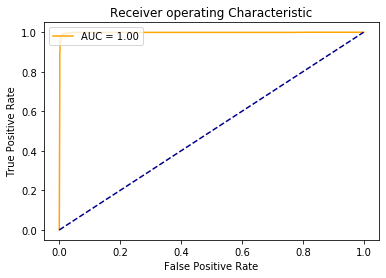

In [66]:
#plot roc curve
plt.title("Receiver operating Characteristic")
plt.plot(fpr,tpr,"orange",label = "AUC = %0.2f" % roc_auc)
plt.legend(loc="upper left")
plt.plot([0,1],[0,1],color="darkblue",linestyle="--")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

# DOWN-SAMPLING/ UNDER-SAMPLING

In [67]:
print(marketing["responded"].value_counts())
df_majority=marketing[marketing.responded==0]
df_minority=marketing[marketing.responded==1]

0    6574
1     840
Name: responded, dtype: int64


In [68]:
import sklearn.utils as ut
#down-sample majority class
df_majority_downsampled=ut.resample(df_majority,
                                  replace=False, #sample without replacement
                                  n_samples=840, # to match minority class
                                  random_state=1) #reproducible results

In [69]:
#combine down-sampled majority class with minority class
df_downsampled=pd.concat([df_majority_downsampled,df_minority])
df_downsampled.responded.value_counts()

1    840
0    840
Name: responded, dtype: int64

In [70]:
df_downsampled.shape


(1680, 25)

In [71]:
x_upsampled=df_upsampled.drop("responded",axis=1)
y_upsampled=df_upsampled["responded"]

In [72]:
#save numerical columns in a alist
cnames=["custAge","campaign","pdays","previous","emp.var.rate","cons.price.idx","cons.conf.idx",
        "euribor3m","nr.employed","pmonths","pastEmail"]

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
for col in cnames:
    x_upsampled[col]=sc.fit_transform(x_upsampled[col].values.reshape(-1,1))
    
x_upsampled.head()

,custAge,profession,marital,schooling,default_1,default_2,housing_1,housing_2,loan_1,loan_2,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
0,1.377180,0,2,6,1,0,1,0,1,0,...,-0.325314,-0.453227,1,0.263351,-0.431335,-0.297790,0.690567,0.731752,-0.367893,-0.356188
1,-0.037966,1,1,6,1,0,1,0,1,0,...,-0.325314,-0.453227,1,1.141928,0.705235,-0.426537,1.098455,1.103462,-0.367893,-0.356188
2,0.149918,9,1,3,1,0,1,0,1,0,...,-0.325314,-0.453227,1,0.966213,0.825541,0.732185,1.043823,0.676513,-0.367893,-0.356188
3,1.377180,4,0,6,1,0,0,1,0,1,...,-0.325314,-0.453227,1,1.141928,0.705235,-0.426537,1.099516,1.103462,-0.367893,-0.356188
4,-0.037966,0,0,6,1,0,0,1,1,0,...,-0.325314,0.946264,0,-0.732371,-0.917306,-1.070271,-0.847633,-0.381078,-0.367893,0.213331
